<a href="https://colab.research.google.com/github/ansh-999/Collab/blob/main/Task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
Epoch 1/50
76/76 [==============================] - 14s 29ms/step - loss: 0.0063 - val_loss: 1.1964e-04
Epoch 2/50
76/76 [==============================] - 2s 21ms/step - loss: 1.6736e-04 - val_loss: 1.4171e-04
Epoch 3/50
76/76 [==============================] - 2s 22ms/step - loss: 1.6454e-04 - val_loss: 1.0643e-04
Epoch 4/50
76/76 [==============================] - 1s 13ms/step - loss: 1.7528e-04 - val_loss: 1.2254e-04
Epoch 5/50
76/76 [==============================] - 1s 18ms/step - loss: 1.7147e-04 - val_loss: 1.0826e-04
Epoch 6/50
76/76 [==============================] - 1s 16ms/step - loss: 1.6636e-04 - val_loss: 1.0285e-04
Epoch 7/50
76/76 [==============================] - 1s 14ms/step - loss: 1.7441e-04 - val_loss: 1.0130e-04
Epoch 8/50
76/76 [==============================] - 1s 16ms/step - loss: 1.6854e-04 - val_loss: 1.1512e-04
Epoch 9/50
76/76 [==============================] - 1s 14ms/step - loss: 1.966

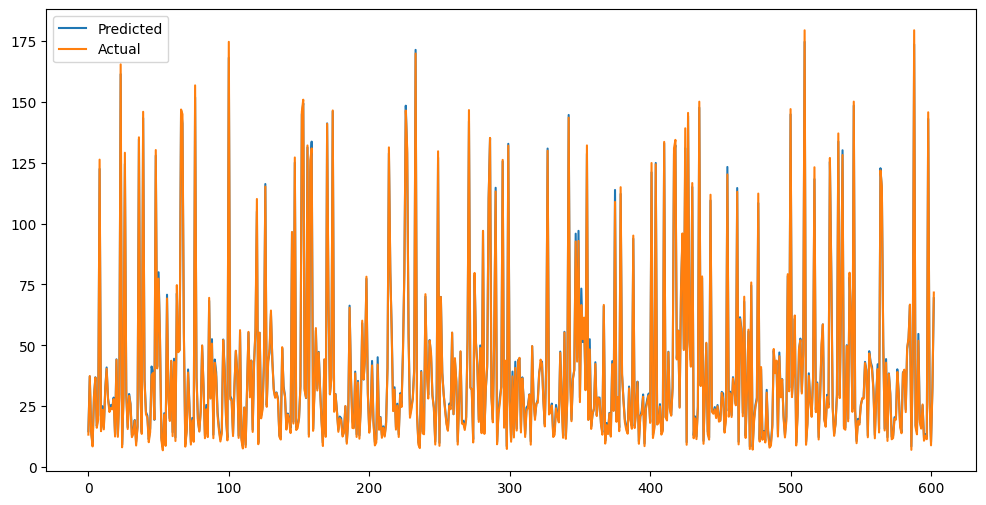

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2022-01-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Select the 'Close' price for prediction
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare data for training
sequence_length = 10  # Number of time steps to look back
X = []
y = []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i : i + sequence_length])
    y.append(data_scaled[i + sequence_length])
X, y = np.array(X), np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict stock prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()
